In [1]:
import pandas as pd
import numpy as np
import sqlalchemy
import requests
import locale
import json
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date
import time
import statistics
import pandas_datareader.data as pdr
import functools as ft
from streamlit_echarts import st_echarts
from ipywidgets import widgets



In [2]:
# Create a temporary sqlite database
database_connection_string = 'sqlite:///'

# Create an engine to interact with the database
engine = sqlalchemy.create_engine(database_connection_string)

In [3]:
def get_data(tickers, start_date, end_date):
    
    """Read in daily price(adjusted close) of asset from CSV files for a given set of dates."""
    
    # download daily price data for each of the stocks in the portfolio
    df = pdr.get_data_yahoo(stocks, start=start_date, end = end_date)['Adj Close']
    df.sort_index(inplace = True)
    
    return df

In [4]:
stocks = ['BTC-USD','ETH-USD','USDT-USD','BNB-USD','ADA-USD','XRP-USD','SOL-USD','DOGE-USD','DOT-USD','UNI-USD','BTT2-USD','TRX-USD','NEO-USD', 'XVG-USD']

In [5]:
crypto_prices = get_data(stocks, '06/01/2021', '06/01/2022' )

print(crypto_prices.head())
print(crypto_prices.tail())

Symbols          BTC-USD      ETH-USD  USDT-USD     BNB-USD   ADA-USD  \
Date                                                                    
2021-06-01  36684.925781  2633.518311  1.000109  362.794647  1.734753   
2021-06-02  37575.179688  2706.125000  1.000550  401.262329  1.752824   
2021-06-03  39208.765625  2855.126465  1.000571  427.807922  1.840471   
2021-06-04  36894.406250  2688.195068  1.001038  391.395325  1.710908   
2021-06-05  35551.957031  2630.576904  1.000313  390.431854  1.659009   

Symbols      XRP-USD    SOL-USD  DOGE-USD    DOT-USD   UNI-USD  BTT2-USD  \
Date                                                                       
2021-06-01  1.011001  30.985260  0.370077  22.810846  0.000770       NaN   
2021-06-02  1.024400  33.956318  0.423374  25.957727  0.000790       NaN   
2021-06-03  1.045321  39.470905  0.399963  27.013458  0.001724       NaN   
2021-06-04  0.970196  37.415070  0.376323  25.008299  0.002953       NaN   
2021-06-05  0.923286  39.585400 

In [6]:
def get_historical_data(ticker, start_date, end_date):
    # Pull Historical Data
    data = yf.download(ticker, start=start_date, end=end_date,progress=False)
    # Calculate Daily Returns
    data['Daily Return'] = data['Adj Close'].pct_change()   
    return data.dropna()

In [7]:
def std_dev(data):
    # Get number of observations
    n = len(data)
    # Calculate mean
    mean = sum(data) / n
    # Calculate deviations from the mean
    deviations = sum([(x - mean)**2 for x in data])
    # Calculate Variance & Standard Deviation
    variance = deviations / (n - 1)
    s = variance**(1/2)
    return s

In [8]:
# Sharpe Ratio From Scratch
def annualize_sharpe_ratio(data, risk_free_rate=0.0):
    # Calculate Average Daily Return
    mean_daily_return = sum(data) / len(data)
    # Calculate Standard Deviation
    s = std_dev(data)
    # Calculate Daily Sharpe Ratio
    daily_sharpe_ratio = (mean_daily_return - risk_free_rate) / s
    # Annualize Daily Sharpe Ratio
    sharpe_ratio = 252**(1/2) * daily_sharpe_ratio
    
    return sharpe_ratio

In [9]:
# Sharpe Ratio From Scratch
def sharpe_ratio(data, risk_free_rate=0.0):
    # Calculate Average Daily Return
    mean_daily_return = sum(data) / len(data)
    # Calculate Standard Deviation
    s = std_dev(data)
    # Calculate Daily Sharpe Ratio
    daily_sharpe_ratio = (mean_daily_return - risk_free_rate) / s
    # Annualize Daily Sharpe Ratio
    sharpe_ratio = 252**(1/2) * daily_sharpe_ratio
    
    return sharpe_ratio

In [10]:
btc_df = get_historical_data('BTC-USD', start_date='2021-06-01', end_date='2022-06-01')
eth_df = get_historical_data('ETH-USD', start_date='2021-06-01', end_date='2022-06-01')
usdt_df = get_historical_data('USDT-USD', start_date='2021-06-01', end_date='2022-06-01')
bnb_df = get_historical_data('BNB-USD', start_date='2021-06-01', end_date='2022-06-01')
ada_df = get_historical_data('ADA-USD', start_date='2021-06-01', end_date='2022-06-01')
xrp_df = get_historical_data('XRP-USD', start_date='2021-06-01', end_date='2022-06-01')
sol_df = get_historical_data('SOL-USD', start_date='2021-06-01', end_date='2022-06-01')
doge_df = get_historical_data('DOGE-USD', start_date='2021-06-01', end_date='2022-06-01')
dot_df = get_historical_data('DOT-USD', start_date='2021-06-01', end_date='2022-06-01')
uni_df = get_historical_data('UNI-USD', start_date='2021-06-01', end_date='2022-06-01')
btt2_df = get_historical_data('BTT2-USD', start_date='2021-06-01', end_date='2022-06-01')
trx_df = get_historical_data('TRX-USD', start_date='2021-06-01', end_date='2022-06-01')
neo_df = get_historical_data('NEO-USD', start_date='2021-06-01', end_date='2022-06-01')
xvg_df = get_historical_data('XVG-USD', start_date='2021-06-01', end_date='2022-06-01')

In [11]:
#display(btc_df)

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2021-06-02,36699.921875,38231.339844,35966.308594,37575.179688,37575.179688,33070867190,0.024268
2021-06-03,37599.410156,39478.953125,37243.972656,39208.765625,39208.765625,35460750427,0.043475
2021-06-04,39242.484375,39242.484375,35717.722656,36894.406250,36894.406250,41831090187,-0.059027
2021-06-05,36880.156250,37917.714844,34900.414062,35551.957031,35551.957031,35959473399,-0.036386
2021-06-06,35538.609375,36436.421875,35304.578125,35862.378906,35862.378906,28913440585,0.008731
...,...,...,...,...,...,...,...
2022-05-28,28622.625000,28814.900391,28554.566406,28814.900391,28814.900391,35519577634,0.006544
2022-05-29,29019.867188,29498.009766,28841.107422,29445.957031,29445.957031,18093886409,0.021900
2022-05-30,29443.365234,31949.630859,29303.572266,31726.390625,31726.390625,39277993274,0.077445


In [12]:
display(annualize_sharpe_ratio(btc_df['Daily Return']))
display(annualize_sharpe_ratio(eth_df['Daily Return']))
display(annualize_sharpe_ratio(usdt_df['Daily Return']))
display(annualize_sharpe_ratio(bnb_df['Daily Return']))
display(annualize_sharpe_ratio(ada_df['Daily Return']))
display(annualize_sharpe_ratio(xrp_df['Daily Return']))
display(annualize_sharpe_ratio(sol_df['Daily Return']))
display(annualize_sharpe_ratio(doge_df['Daily Return']))
display(annualize_sharpe_ratio(dot_df['Daily Return']))
display(annualize_sharpe_ratio(trx_df['Daily Return']))
display(annualize_sharpe_ratio(btt2_df['Daily Return']))
display(annualize_sharpe_ratio(uni_df['Daily Return']))
display(annualize_sharpe_ratio(neo_df['Daily Return']))
display(annualize_sharpe_ratio(xvg_df['Daily Return']))

0.03511380804828396

-0.025133959840694824

-0.07216289386793075

0.16140915070756043

-0.515356130506367

-0.3987687936909859

0.6893390943929519

-0.7002334516120625

-0.1143373386767076

0.4550952216602862

-1.047293141717934

1.4381682188247902

-0.7501979898973351

-0.6920036535745615

In [13]:
# Next, we'll define a function for calculating daily returns for our coins
def calc_daily_returns(df):
    return (df.pct_change())

In [14]:
crypto_daily_rets = calc_daily_returns(crypto_prices)
print(crypto_daily_rets.head())
print(crypto_daily_rets.tail())

Symbols      BTC-USD   ETH-USD  USDT-USD   BNB-USD   ADA-USD   XRP-USD  \
Date                                                                     
2021-06-01       NaN       NaN       NaN       NaN       NaN       NaN   
2021-06-02  0.024268  0.027570  0.000441  0.106032  0.010417  0.013253   
2021-06-03  0.043475  0.055061  0.000021  0.066155  0.050003  0.020423   
2021-06-04 -0.059027 -0.058467  0.000467 -0.085114 -0.070397 -0.071868   
2021-06-05 -0.036386 -0.021434 -0.000724 -0.002462 -0.030334 -0.048351   

Symbols      SOL-USD  DOGE-USD   DOT-USD   UNI-USD  BTT2-USD   TRX-USD  \
Date                                                                     
2021-06-01       NaN       NaN       NaN       NaN       NaN       NaN   
2021-06-02  0.095886  0.144016  0.137955  0.025974       NaN  0.025021   
2021-06-03  0.162402 -0.055296  0.040671  1.182278       NaN  0.052255   
2021-06-04 -0.052085 -0.059105 -0.074228  0.712877       NaN -0.059268   
2021-06-05  0.058007 -0.011017 -0.047

In [15]:
# Define a function for creating covariance matrices
def create_covariance_matrix(daily_returns):
    return daily_returns.cov()

In [16]:
crypto_cov_matrix = create_covariance_matrix(crypto_daily_rets)
round((crypto_cov_matrix),4)

Symbols,BTC-USD,ETH-USD,USDT-USD,BNB-USD,ADA-USD,XRP-USD,SOL-USD,DOGE-USD,DOT-USD,UNI-USD,BTT2-USD,TRX-USD,NEO-USD,XVG-USD
Symbols,,,,,,,,,,,,,,
BTC-USD,0.0013,0.0013,-0.0,0.0012,0.0014,0.0013,0.0014,0.0014,0.0012,0.0011,0.0004,0.0011,0.0016,0.0015
ETH-USD,0.0013,0.0019,0.0,0.0016,0.0017,0.0017,0.0019,0.0017,0.0016,0.0009,0.0004,0.0014,0.0019,0.0019
USDT-USD,-0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000
BNB-USD,0.0012,0.0016,0.0,0.0019,0.0017,0.0017,0.0018,0.0018,0.0016,0.0017,0.0005,0.0014,0.0020,0.0019
ADA-USD,0.0014,0.0017,0.0,0.0017,0.0028,0.0020,0.0022,0.0019,0.0016,0.0032,0.0014,0.0017,0.0022,0.0022
XRP-USD,0.0013,0.0017,0.0,0.0017,0.0020,0.0025,0.0019,0.0020,0.0017,0.0023,0.0005,0.0017,0.0022,0.0021
SOL-USD,0.0014,0.0019,0.0,0.0018,0.0022,0.0019,0.0042,0.0020,0.0019,0.0019,0.0005,0.0016,0.0024,0.0024
DOGE-USD,0.0014,0.0017,0.0,0.0018,0.0019,0.0020,0.0020,0.0032,0.0017,0.0022,0.0003,0.0017,0.0022,0.0021
DOT-USD,0.0012,0.0016,-0.0,0.0016,0.0016,0.0017,0.0019,0.0017,0.0031,0.0009,0.0007,0.0016,0.0020,0.0018


In [17]:
# Define a function for creating variance matrices
def create_variance_matrix(daily_returns):
    return daily_returns.var()

In [18]:
#statistics.variance(cs)
crypto_var_matrix = create_variance_matrix(crypto_daily_rets)
round((crypto_var_matrix),5)

Symbols
BTC-USD     0.00130
ETH-USD     0.00186
USDT-USD    0.00000
BNB-USD     0.00188
ADA-USD     0.00283
XRP-USD     0.00255
SOL-USD     0.00419
DOGE-USD    0.00322
DOT-USD     0.00307
UNI-USD     0.15813
BTT2-USD    0.00510
TRX-USD     0.00215
NEO-USD     0.00317
XVG-USD     0.00377
dtype: float64

In [19]:
BTC_variance = (btc_df['Daily Return']).var()
BTC_variance

0.0013009768007315537

In [20]:
ETH_variance = (eth_df['Daily Return']).var()
ETH_variance

0.001864410764922964

In [21]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
usdt_url = "https://api.alternative.me/v2/ticker/Tether/?convert=USD"
bnb_url = "https://api.alternative.me/v2/ticker/BinanceCoin/?convert=USD"
ada_url = "https://api.alternative.me/v2/ticker/Cardano/?convert=USD"
xrp_url = "https://api.alternative.me/v2/ticker/Ripple/?convert=USD"
sol_url = "https://api.alternative.me/v2/ticker/Solana/?convert=USD"
doge_url = "https://api.alternative.me/v2/ticker/Dogecoin/?convert=USD"
dot_url = "https://api.alternative.me/v2/ticker/Polkadot/?convert=USD"
uni_url = "https://api.alternative.me/v2/ticker/Uniswap/?convert=USD"
btt2_url = "https://api.alternative.me/v2/ticker/bittorrent-2/?convert=USD"
trx_url = "https://api.alternative.me/v2/ticker/Tron/?convert=USD"
neo_url = "https://api.alternative.me/v2/ticker/Neo/?convert=USD"
xvg_url = "https://api.alternative.me/v2/ticker/Verge/?convert=USD"

In [22]:
btc_response = requests.get(btc_url).json()
eth_response= requests.get(eth_url).json()
usdt_response= requests.get(usdt_url).json()
bnb_response= requests.get(bnb_url).json()
ada_response = requests.get(ada_url).json()
xrp_response = requests.get(xrp_url).json()
sol_response = requests.get(sol_url).json()
doge_response = requests.get(doge_url).json()
dot_response = requests.get(dot_url).json()
uni_response= requests.get(uni_url).json()
btt2_response = requests.get(btt2_url).json()
trx_response = requests.get(trx_url).json()
neo_response = requests.get(neo_url).json()
xvg_response= requests.get(xvg_url).json()

In [23]:
print(json.dumps(btc_response, indent=4, sort_keys=True))
#print(json.dumps(eth_response, indent=4, sort_keys=True))
#print(json.dumps(usdt_response, indent=4, sort_keys=True))
#print(json.dumps(bnb_response, indent=4, sort_keys=True))
#print(json.dumps(ada_response, indent=4, sort_keys=True))
#print(json.dumps(xrp_response, indent=4, sort_keys=True))
#print(json.dumps(sol_response, indent=4, sort_keys=True))
#print(json.dumps(doge_response, indent=4, sort_keys=True))
#print(json.dumps(dot_response, indent=4, sort_keys=True))
#print(json.dumps(uni_response, indent=4, sort_keys=True))
#print(json.dumps(btt2_response, indent=4, sort_keys=True))
#print(json.dumps(trx_response, indent=4, sort_keys=True))
#print(json.dumps(neo_response, indent=4, sort_keys=True))
#print(json.dumps(xvg_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 19061337,
            "id": 1,
            "last_updated": 1654660132,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 570625072389,
                    "percent_change_1h": -3.75731363926492,
                    "percent_change_24h": 0.992448621857089,
                    "percent_change_7d": -6.12754150743807,
                    "percentage_change_1h": -3.75731363926492,
                    "percentage_change_24h": 0.992448621857089,
                    "percentage_change_7d": -6.12754150743807,
                    "price": 29913.0,
                    "volume_24h": 35479488379
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19061337,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [24]:
# Crypto names
btc_name = btc_response["data"]["1"]["name"]
eth_name = eth_response["data"]["1027"]["name"]
usdt_name = usdt_response["data"]["825"]["name"]
bnb_name = bnb_response["data"]["1839"]["name"]
ada_name = ada_response["data"]["2010"]["name"]
xrp_name = xrp_response["data"]["52"]["name"]
sol_name = sol_response["data"]["11733"]["name"]
doge_name = doge_response["data"]["74"]["name"]
dot_name = dot_response["data"]["11517"]["name"]
uni_name = uni_response["data"]["11968"]["name"]
btt2_name = btt2_response["data"]["3084"]["name"]
trx_name = trx_response["data"]["1958"]["name"]
neo_name = neo_response["data"]["1376"]["name"]
xvg_name = xvg_response["data"]["693"]["name"]

In [25]:
# Crypto Symbol
btc_symbol = btc_response["data"]["1"]["symbol"]
eth_symbol = eth_response["data"]["1027"]["symbol"]
usdt_symbol = usdt_response["data"]["825"]["symbol"]
bnb_symbol = bnb_response["data"]["1839"]["symbol"]
ada_symbol = ada_response["data"]["2010"]["symbol"]
xrp_symbol = xrp_response["data"]["52"]["symbol"]
sol_symbol = sol_response["data"]["11733"]["symbol"]
doge_symbol = doge_response["data"]["74"]["symbol"]
dot_symbol = dot_response["data"]["11517"]["symbol"]
uni_symbol = uni_response["data"]["11968"]["symbol"]
btt2_symbol = btt2_response["data"]["3084"]["symbol"]
trx_symbol = trx_response["data"]["1958"]["symbol"]
neo_symbol = neo_response["data"]["1376"]["symbol"]
xvg_symbol = xvg_response["data"]["693"]["symbol"]

In [26]:
# Crypto Category
btc_cat = 'BTC'
eth_cat = "Altcoins"
usdt_cat = "Stablecoin"
bnb_cat = "Stablecoin"
ada_cat = 'Altcoins'
xrp_cat = 'Altcoins'
sol_cat = 'Altcoins'
doge_cat = 'Meme coin'
dot_cat = 'Altcoins'
uni_cat = "Altcoins"
btt2_cat = "Altcoins"
trx_cat = "Altcoins"
neo_cat = "Altcoins"
xvg_cat = "Altcoins"

In [27]:
# Crypto price
btc_price = "${:,.2f}".format(btc_response["data"]["1"]["quotes"]["USD"]["price"])
eth_price = "${:,.2f}".format(eth_response["data"]["1027"]["quotes"]["USD"]["price"])
usdt_price = "${:,.2f}".format(usdt_response["data"]["825"]["quotes"]["USD"]["price"])
bnb_price = "${:,.2f}".format(bnb_response["data"]["1839"]["quotes"]["USD"]["price"])
ada_price = "${:,.2f}".format(ada_response["data"]["2010"]["quotes"]["USD"]["price"])
xrp_price = "${:,.2f}".format(xrp_response["data"]["52"]["quotes"]["USD"]["price"])
sol_price = "${:,.2f}".format(sol_response["data"]["11733"]["quotes"]["USD"]["price"])
doge_price = "${:,.2f}".format(doge_response["data"]["74"]["quotes"]["USD"]["price"])
dot_price = "${:,.2f}".format(dot_response["data"]["11517"]["quotes"]["USD"]["price"])
uni_price = "${:,.2f}".format(uni_response["data"]["11968"]["quotes"]["USD"]["price"])
btt2_price = "${:,.2f}".format(btt2_response["data"]["3084"]["quotes"]["USD"]["price"])
trx_price = "${:,.2f}".format(trx_response["data"]["1958"]["quotes"]["USD"]["price"])
neo_price = "${:,.2f}".format(neo_response["data"]["1376"]["quotes"]["USD"]["price"])
xvg_price = "${:,.2f}".format(xvg_response["data"]["693"]["quotes"]["USD"]["price"])

In [28]:
print(btc_price)

$29,913.00


In [29]:
# 24hr Volume
btc_vol = f"$ ""{:,}".format(btc_response["data"]["1"]["quotes"]["USD"]["volume_24h"])
eth_vol = f"$ ""{:,}".format(eth_response["data"]["1027"]["quotes"]["USD"]["volume_24h"])
usdt_vol = f"$ ""{:,}".format(usdt_response["data"]["825"]["quotes"]["USD"]["volume_24h"])
bnb_vol = f"$ ""{:,}".format(bnb_response["data"]["1839"]["quotes"]["USD"]["volume_24h"])
ada_vol = f"$ ""{:,}".format(ada_response["data"]["2010"]["quotes"]["USD"]["volume_24h"])
xrp_vol = f"$ ""{:,}".format(xrp_response["data"]["52"]["quotes"]["USD"]["volume_24h"])
sol_vol = f"$ ""{:,}".format(sol_response["data"]["11733"]["quotes"]["USD"]["volume_24h"])
doge_vol = f"$ ""{:,}".format(doge_response["data"]["74"]["quotes"]["USD"]["volume_24h"])
dot_vol = f"$ ""{:,}".format(dot_response["data"]["11517"]["quotes"]["USD"]["volume_24h"])
uni_vol = f"$ ""{:,}".format(uni_response["data"]["11968"]["quotes"]["USD"]["volume_24h"])
btt2_vol = f"$ ""{:,}".format(btt2_response["data"]["3084"]["quotes"]["USD"]["volume_24h"])
trx_vol = f"$ ""{:,}".format(trx_response["data"]["1958"]["quotes"]["USD"]["volume_24h"])
neo_vol = f"$ ""{:,}".format(neo_response["data"]["1376"]["quotes"]["USD"]["volume_24h"])
xvg_vol = f"$ ""{:,}".format(xvg_response["data"]["693"]["quotes"]["USD"]["volume_24h"])

In [30]:
# Market Cap
btc_cap = f"$ ""{:,}".format(btc_response["data"]["1"]["quotes"]["USD"]["market_cap"])
eth_cap = f"$ ""{:,}".format(eth_response["data"]["1027"]["quotes"]["USD"]["market_cap"])
usdt_cap = f"$ ""{:,}".format(usdt_response["data"]["825"]["quotes"]["USD"]["market_cap"])
bnb_cap = f"$ ""{:,}".format(bnb_response["data"]["1839"]["quotes"]["USD"]["market_cap"])
ada_cap = f"$ ""{:,}".format(ada_response["data"]["2010"]["quotes"]["USD"]["market_cap"])
xrp_cap = f"$ ""{:,}".format(xrp_response["data"]["52"]["quotes"]["USD"]["market_cap"])
sol_cap = f"$ ""{:,}".format(sol_response["data"]["11733"]["quotes"]["USD"]["market_cap"])
doge_cap =f"$ " "{:,}".format(doge_response["data"]["74"]["quotes"]["USD"]["market_cap"])
dot_cap = f"$ ""{:,}".format(dot_response["data"]["11517"]["quotes"]["USD"]["market_cap"])
uni_cap = f"$ ""{:,}".format(uni_response["data"]["11968"]["quotes"]["USD"]["market_cap"])
btt2_cap = f"$ ""{:,}".format(btt2_response["data"]["3084"]["quotes"]["USD"]["market_cap"])
trx_cap =f"$ " "{:,}".format(trx_response["data"]["1958"]["quotes"]["USD"]["market_cap"])
neo_cap = f"$ ""{:,}".format(neo_response["data"]["1376"]["quotes"]["USD"]["market_cap"])
xvg_cap = f"$ ""{:,}".format(xvg_response["data"]["693"]["quotes"]["USD"]["market_cap"])

In [31]:
# percent_change_1h
btc_1hr = "{:.2%}".format((btc_response["data"]["1"]["quotes"]["USD"]["percentage_change_1h"] / 100))
eth_1hr = "{:.2%}".format((eth_response["data"]["1027"]["quotes"]["USD"]["percentage_change_1h"] / 100))
usdt_1hr = "{:.2%}".format((usdt_response["data"]["825"]["quotes"]["USD"]["percentage_change_1h"] / 100))
bnb_1hr = "{:.2%}".format((bnb_response["data"]["1839"]["quotes"]["USD"]["percentage_change_1h"] / 100))
ada_1hr = "{:.2%}".format((ada_response["data"]["2010"]["quotes"]["USD"]["percentage_change_1h"] / 100))
xrp_1hr = "{:.2%}".format((xrp_response["data"]["52"]["quotes"]["USD"]["percentage_change_1h"] / 100))
ada_1hr = "{:.2%}".format((ada_response["data"]["2010"]["quotes"]["USD"]["percentage_change_1h"] / 100))
sol_1hr = "{:.2%}".format((sol_response["data"]["11733"]["quotes"]["USD"]["percentage_change_1h"] / 100))
doge_1hr = "{:.2%}".format((doge_response["data"]["74"]["quotes"]["USD"]["percentage_change_1h"] / 100))
dot_1hr = "{:.2%}".format((dot_response["data"]["11517"]["quotes"]["USD"]["percentage_change_1h"] / 100))
uni_1hr = "{:.2%}".format((uni_response["data"]["11968"]["quotes"]["USD"]["percentage_change_1h"] / 100))
btt2_1hr = "{:.2%}".format((btt2_response["data"]["3084"]["quotes"]["USD"]["percentage_change_1h"] / 100))
trx_1hr = "{:.2%}".format((trx_response["data"]["1958"]["quotes"]["USD"]["percentage_change_1h"] / 100))
neo_1hr = "{:.2%}".format((neo_response["data"]["1376"]["quotes"]["USD"]["percentage_change_1h"] / 100))
xvg_1hr = "{:.2%}".format((xvg_response["data"]["693"]["quotes"]["USD"]["percentage_change_1h"] / 100))

In [32]:
# percent_change_24h
btc_24hr = "{:.2%}".format((btc_response["data"]["1"]["quotes"]["USD"]["percentage_change_24h"] / 100))
eth_24hr = "{:.2%}".format((eth_response["data"]["1027"]["quotes"]["USD"]["percentage_change_24h"] / 100))
usdt_24hr = "{:.2%}".format((usdt_response["data"]["825"]["quotes"]["USD"]["percentage_change_24h"] / 100))
bnb_24hr = "{:.2%}".format((bnb_response["data"]["1839"]["quotes"]["USD"]["percentage_change_24h"] / 100))
ada_24hr = "{:.2%}".format((ada_response["data"]["2010"]["quotes"]["USD"]["percentage_change_24h"] / 100))
xrp_24hr = "{:.2%}".format((xrp_response["data"]["52"]["quotes"]["USD"]["percentage_change_24h"] / 100))
sol_24hr = "{:.2%}".format((sol_response["data"]["11733"]["quotes"]["USD"]["percentage_change_24h"] / 100))
doge_24hr= "{:.2%}".format((doge_response["data"]["74"]["quotes"]["USD"]["percentage_change_24h"] / 100))
dot_24hr = "{:.2%}".format((dot_response["data"]["11517"]["quotes"]["USD"]["percentage_change_24h"] / 100))
uni_24hr = "{:.2%}".format((uni_response["data"]["11968"]["quotes"]["USD"]["percentage_change_24h"] / 100))
btt2_24hr = "{:.2%}".format((btt2_response["data"]["3084"]["quotes"]["USD"]["percentage_change_24h"] / 100))
trx_24hr = "{:.2%}".format((trx_response["data"]["1958"]["quotes"]["USD"]["percentage_change_24h"] / 100))
neo_24hr = "{:.2%}".format((neo_response["data"]["1376"]["quotes"]["USD"]["percentage_change_24h"] / 100))
xvg_24hr = "{:.2%}".format((xvg_response["data"]["693"]["quotes"]["USD"]["percentage_change_24h"] / 100))

In [33]:
# percent_change_7d
btc_7d =  "{:.2%}".format((btc_response["data"]["1"]["quotes"]["USD"]["percentage_change_7d"] / 100))
eth_7d =  "{:.2%}".format((eth_response["data"]["1027"]["quotes"]["USD"]["percentage_change_7d"] / 100))
usdt_7d =  "{:.2%}".format((usdt_response["data"]["825"]["quotes"]["USD"]["percentage_change_7d"] / 100))
bnb_7d =  "{:.2%}".format((bnb_response["data"]["1839"]["quotes"]["USD"]["percentage_change_7d"] / 100))
ada_7d = "{:.2%}".format((ada_response["data"]["2010"]["quotes"]["USD"]["percentage_change_7d"] / 100))
xrp_7d = "{:.2%}".format((xrp_response["data"]["52"]["quotes"]["USD"]["percentage_change_7d"] / 100))
sol_7d = "{:.2%}".format((sol_response["data"]["11733"]["quotes"]["USD"]["percentage_change_7d"] / 100))
doge_7d = "{:.2%}".format((doge_response["data"]["74"]["quotes"]["USD"]["percentage_change_7d"] / 100))
dot_7d = "{:.2%}".format((dot_response["data"]["11517"]["quotes"]["USD"]["percentage_change_7d"] / 100))
uni_7d =  "{:.2%}".format((uni_response["data"]["11968"]["quotes"]["USD"]["percentage_change_7d"] / 100))
btt2_7d = "{:.2%}".format((btt2_response["data"]["3084"]["quotes"]["USD"]["percentage_change_7d"] / 100))
trx_7d = "{:.2%}".format((trx_response["data"]["1958"]["quotes"]["USD"]["percentage_change_7d"] / 100))
neo_7d = "{:.2%}".format((neo_response["data"]["1376"]["quotes"]["USD"]["percentage_change_7d"] / 100))
xvg_7d =  "{:.2%}".format((xvg_response["data"]["693"]["quotes"]["USD"]["percentage_change_7d"] / 100))

In [34]:
stocks_dataframe = pd.DataFrame({'Coins': [btc_name,eth_name,usdt_name,bnb_name,ada_name,xrp_name,sol_name,doge_name,dot_name, trx_name,btt2_name,uni_name, neo_name, xvg_name], 'Symbol': [btc_symbol,eth_symbol,usdt_symbol,bnb_symbol,ada_symbol,xrp_symbol,sol_symbol,doge_symbol,dot_symbol,trx_symbol,btt2_symbol, uni_symbol, neo_symbol,xvg_symbol],'Category': [btc_cat,eth_cat,usdt_cat,bnb_cat,ada_cat,xrp_cat,sol_cat,doge_cat,dot_cat,trx_cat,btt2_cat, uni_cat, neo_cat, xvg_cat], 'Price': [btc_price,eth_price,usdt_price,bnb_price,ada_price,xrp_price,sol_price,doge_price,dot_price,trx_price, btt2_price, uni_price, neo_price, xvg_price],'24Hr Volume': [btc_vol,eth_vol,usdt_vol,bnb_vol,ada_vol,xrp_vol,sol_vol,doge_vol,dot_vol,trx_vol, btt2_vol, uni_vol, neo_vol, xvg_vol], 'Market Caplization':[btc_cap,eth_cap,usdt_cap,bnb_cap,ada_cap,xrp_cap,sol_cap,doge_cap,dot_cap,trx_cap, btt2_cap, uni_cap, neo_cap, xvg_cap],'1hr % Change': [btc_1hr,eth_1hr,usdt_1hr,bnb_1hr,ada_1hr,xrp_1hr,sol_1hr,doge_1hr, dot_1hr,trx_1hr,btt2_1hr, uni_1hr, neo_1hr, xvg_1hr], '24hrs %Change': [btc_24hr,eth_24hr,usdt_24hr,bnb_24hr,ada_24hr,xrp_24hr,sol_24hr,doge_24hr,dot_24hr,trx_24hr,btt2_24hr, uni_24hr, neo_24hr, xvg_24hr],'7days %Change': [btc_7d,eth_7d,usdt_7d,bnb_7d,ada_7d,xrp_7d,sol_7d,doge_7d,dot_7d,trx_7d,btt2_7d, uni_7d, neo_7d, xvg_7d], 'Sharpe Ratio': [0.03511, -0.02513, -0.07216,0.16141,-0.51536,-0.39877,0.68934,-0.70023,-0.11434,0.45510,-1.04729,1.43817,-0.75020,-0.69200],'Variance': [0.00130,0.00186,0.00000,0.00188,0.00283,0.00255,0.00419,0.00322,0.00307,0.15813,0.00510,0.00215, 0.00317,0.00377] })
stocks_dataframe.to_sql('Crypto', engine)
engine.table_names()

/var/folders/3v/j3665vvd1qn2w9n50h1qqmqr0000gn/T/ipykernel_26202/8237800.py:3: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['Crypto']

In [35]:
query = """
SELECT "Coins" FROM Crypto;
"""
results = engine.execute(query)
list(results)
type(results)

sqlalchemy.engine.cursor.LegacyCursorResult

In [36]:
stocks_dataframe


,Coins,Symbol,Category,Price,24Hr Volume,Market Caplization,1hr % Change,24hrs %Change,7days %Change,Sharpe Ratio,Variance
0,Bitcoin,BTC,BTC,"$29,913.00","$ 35,479,488,379","$ 570,625,072,389",-3.76%,0.99%,-6.13%,0.03511,0.00130
1,Ethereum,ETH,Altcoins,"$1,771.70","$ 22,990,046,702","$ 213,964,874,793",-3.14%,0.79%,-8.87%,-0.02513,0.00186
2,Tether,USDT,Stablecoin,$1.00,"$ 51,852,848,539","$ 72,884,990,010",-0.43%,-0.50%,-0.36%,-0.07216,0.00000
3,Binance Coin,BNB,Stablecoin,$283.99,"$ 1,620,922,981","$ 46,346,663,414",-2.58%,-0.45%,-11.71%,0.16141,0.00188
4,Cardano,ADA,Altcoins,$0.62,"$ 1,402,153,782","$ 21,088,644,811",-2.97%,5.13%,-1.21%,-0.51536,0.00283
5,XRP,XRP,Altcoins,$0.40,"$ 1,465,589,595","$ 19,110,074,725",-2.58%,1.69%,-6.64%,-0.39877,0.00255
6,Solana,SOL,Altcoins,$38.46,"$ 1,766,919,918","$ 13,127,724,880",-3.92%,-3.05%,-16.33%,0.68934,0.00419
7,Dogecoin,DOGE,Meme coin,$0.08,"$ 374,261,458","$ 10,457,584,439",-2.07%,-0.27%,-7.72%,-0.70023,0.00322
8,Polkadot,DOT,Altcoins,$9.00,"$ 304,706,000","$ 10,062,927,371",-3.04%,-1.21%,-13.87%,-0.11434,0.00307
9,TRON,TRX,Altcoins,$0.08,"$ 966,402,661","$ 7,408,927,452",-2.81%,-0.11%,-5.17%,0.45510,0.15813


In [37]:
type(stocks_dataframe)

pandas.core.frame.DataFrame

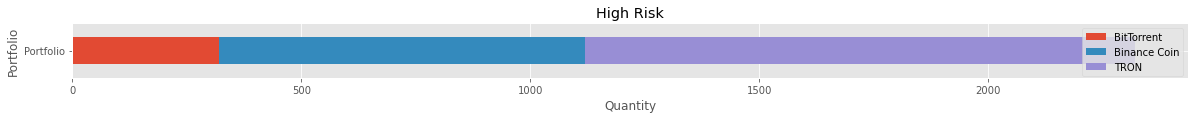

In [38]:
data = {
        'BitTorrent': [320],
        'Binance Coin': [800],
        'TRON':[1200],
        'XRP':[320],
        'DOGE':[800],
        'NEO':[320],
        'Verge':[700],
        'Cardano':[800]
       }

high_risk = pd.DataFrame(data,columns=['BitTorrent','Binance Coin','TRON'], index = ['Portfolio'])
medium_risk = pd.DataFrame(data,columns=['XRP','Binance Coin','TRON','DOGE'], index = ['Portfolio'])
low_risk = pd.DataFrame(data,columns=['NEO','Verge','TRON','DOGE','Cardano'], index = ['Portfolio'])



high_risk .style.use('ggplot')
high_risk .plot.barh(stacked=True, figsize=(20,1))



plt.title('High Risk')
plt.ylabel('Portfolio')
plt.xlabel('Quantity')
plt.show()



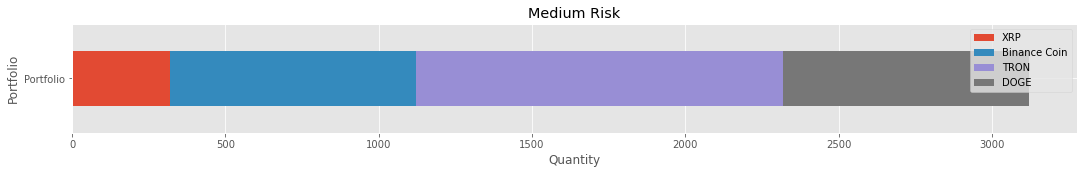

In [39]:
medium_risk .style.use('ggplot')
medium_risk .plot.barh(stacked=True, figsize=(18,2))

plt.title('Medium Risk')
plt.ylabel('Portfolio')
plt.xlabel('Quantity')
plt.show()

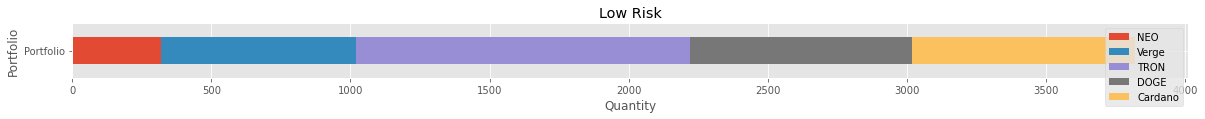

In [40]:
low_risk .style.use('ggplot')
low_risk .plot.barh(stacked=True, figsize=(20,1))

plt.title('Low Risk')
plt.ylabel('Portfolio')
plt.xlabel('Quantity')
plt.show()

In [41]:
display(ada_df)

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2021-06-02,1.736103,1.803849,1.719255,1.752824,1.752824,3453620094,0.010417
2021-06-03,1.754643,1.888650,1.717762,1.840471,1.840471,3443770332,0.050003
2021-06-04,1.846715,1.848485,1.609734,1.710908,1.710908,4583062567,-0.070397
2021-06-05,1.709916,1.783177,1.611715,1.659009,1.659009,2969362191,-0.030334
2021-06-06,1.656461,1.706524,1.647702,1.678248,1.678248,1748045655,0.011597
...,...,...,...,...,...,...,...
2022-05-28,0.458176,0.467449,0.449708,0.464764,0.464764,448858644,0.020322
2022-05-29,0.464732,0.481841,0.457380,0.481126,0.481126,444269488,0.035205
2022-05-30,0.481134,0.574956,0.478083,0.570073,0.570073,1185015742,0.184873


In [42]:
high_risk_plot = ada_df + trx_df
print(high_risk_plot)

                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
2021-06-02  1.812257  1.883412  1.793849  1.830865   1.830865  4763189129   
2021-06-03  1.832718  1.971143  1.794999  1.922590   1.922590  4753262285   
2021-06-04  1.928925  1.931376  1.683732  1.788160   1.788160  6190463930   
2021-06-05  1.787150  1.862990  1.686027  1.734605   1.734605  4225875105   
2021-06-06  1.732025  1.784039  1.723097  1.755755   1.755755  2689572410   
...              ...       ...       ...       ...        ...         ...   
2022-05-28  0.538399  0.549893  0.528886  0.546019   0.546019  1344780162   
2022-05-29  0.545987  0.564001  0.536251  0.561633   0.561633  1188613978   
2022-05-30  0.561639  0.659194  0.558391  0.653332   0.653332  2115409607   
2022-05-31  0.653250  0.766504  0.649288  0.709445   0.709445  4252888253   
2022-06-01  0.709589  0.720916  0.622989  0.636224   0.636224  3162965384   

<AxesSubplot:xlabel='Date'>

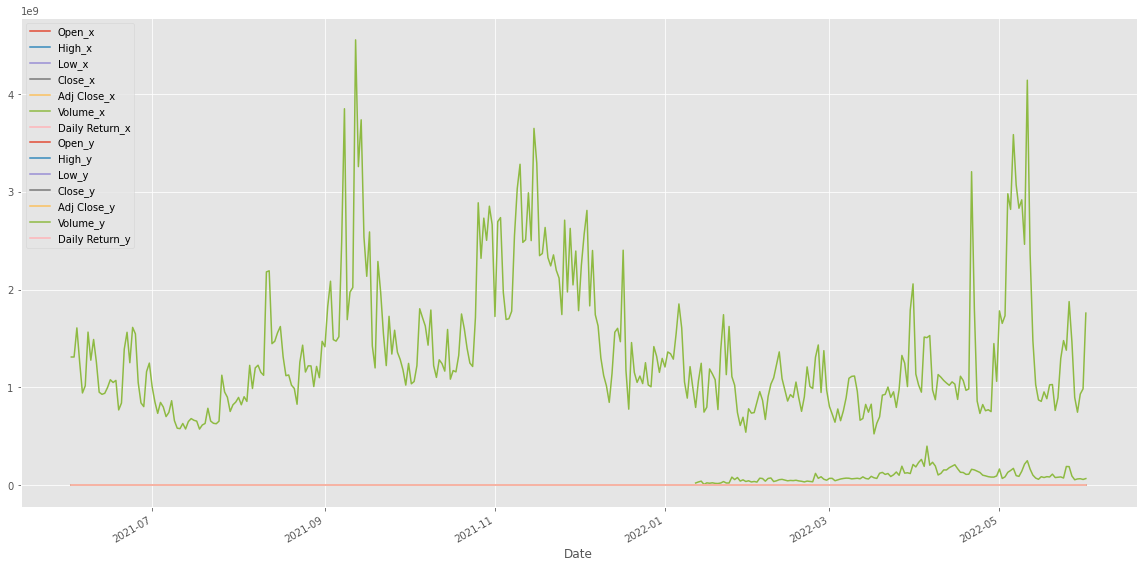

In [43]:
merged_df = pd.merge(btt2_df,trx_df,how='outer',on=['Date'])
merged_df.plot(figsize=(20,10))

In [44]:
dfs = [bnb_df,trx_df, btt2_df]
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='Date'), dfs)

<AxesSubplot:xlabel='Date'>

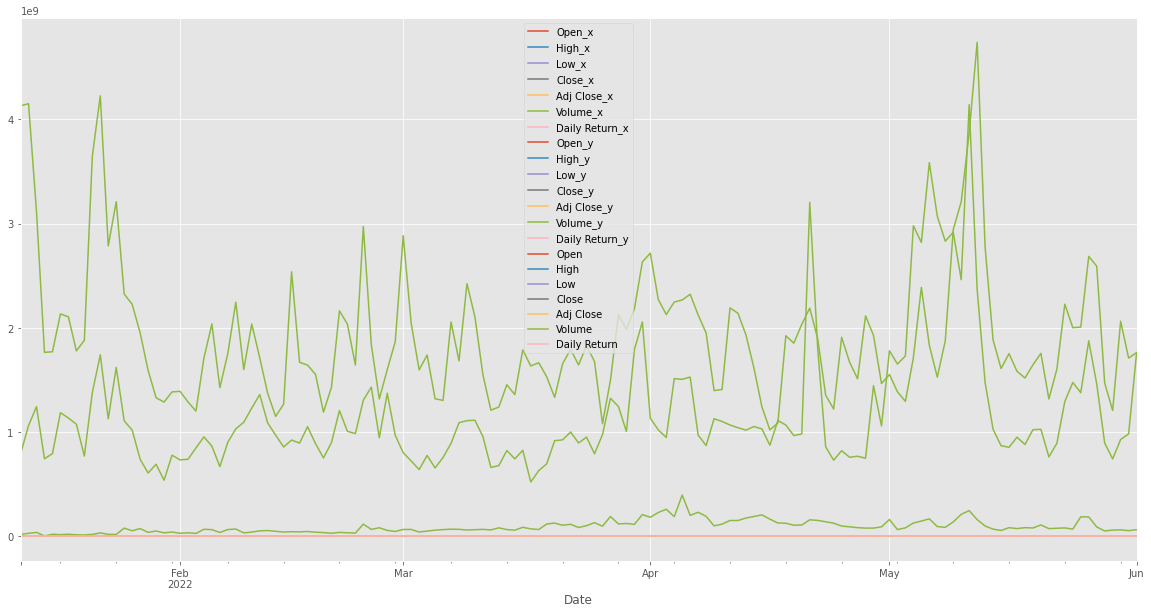

In [45]:
df_final.plot(figsize=(20,10))

In [46]:
#merged_df.groupby("Date").plot(x="USD", y="price")

In [1]:
#df['perc_ret'] = (1 + df.Daily_rets).cumprod() - 1 